In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# first we import the required libraries rather that the two imported above
# our goal is to examine several machine learning methods to find the best
import matplotlib.pyplot as plt 
%matplotlib inline 
# written for the output plot to be given inside the notebook rather than a new window
from matplotlib import style # imported to use style for our plots
import seaborn as sns
# warnings is imported to ignore any possible upcoming warning
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

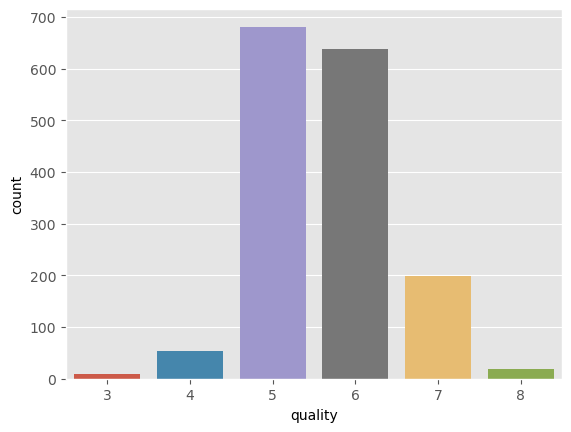

In [9]:
# now, it's time to visualize the data:
style.use('ggplot') # we are using ggplot as the style
sns.countplot(df, x=df['quality'])

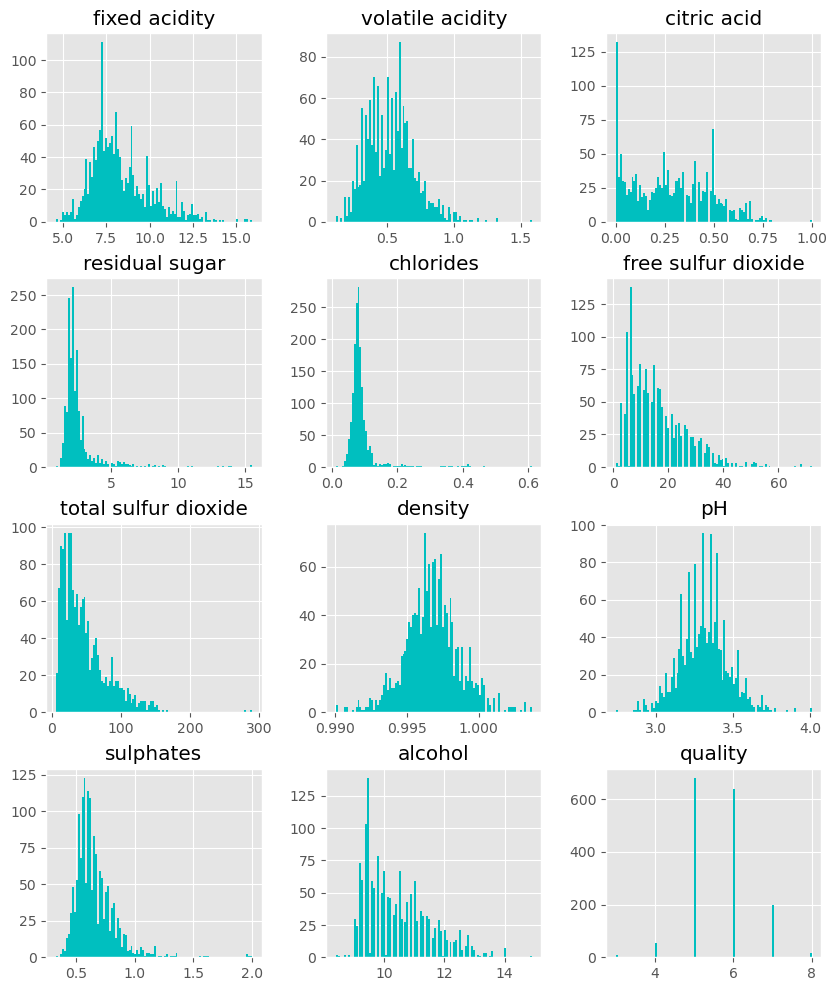

In [12]:
# now, we use a histogram to visualize the distribution of the data:
df.hist(bins=100, figsize=(10,12), color='c')
plt.show()

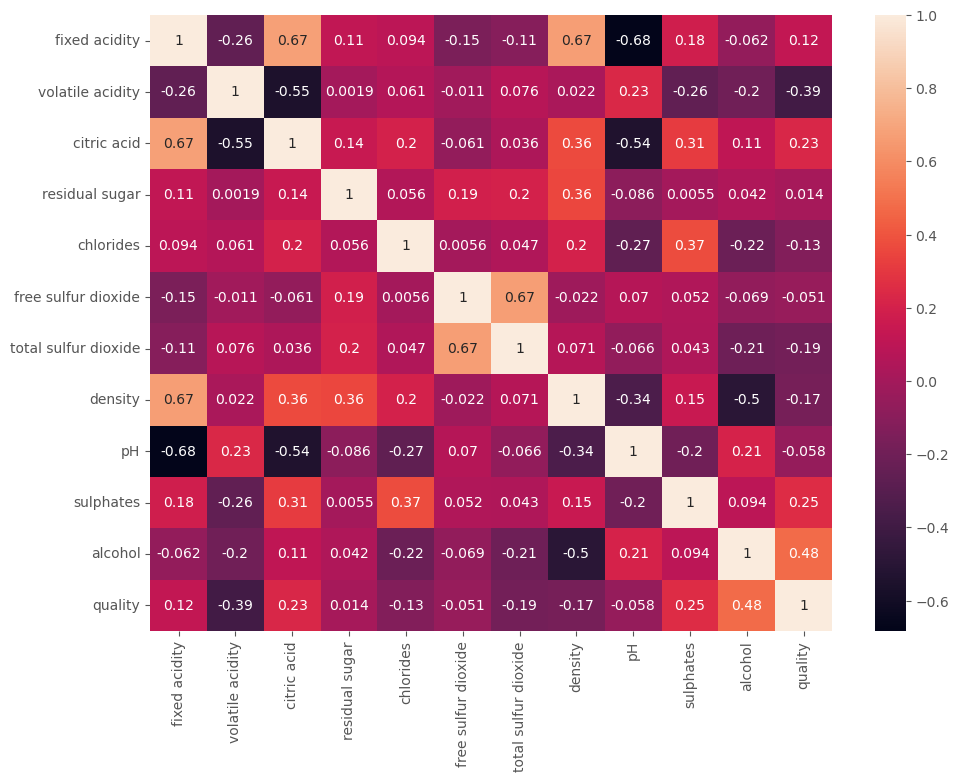

In [13]:
# we plot a heatmap to figure out the correlation between the columns:
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True) # if annot set to False, the correlation values are not shown in the plot
plt.show()

In [14]:
# from the legend of the plot above, we understand that the brighter color shows the higher correlation;
# in this case, in the row "quality", "alcohol" has the brightest color; that means the alcohol is correlated the best with "quality,"
# however, we can list the correlation values regarding the "quality" using this line:
df.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

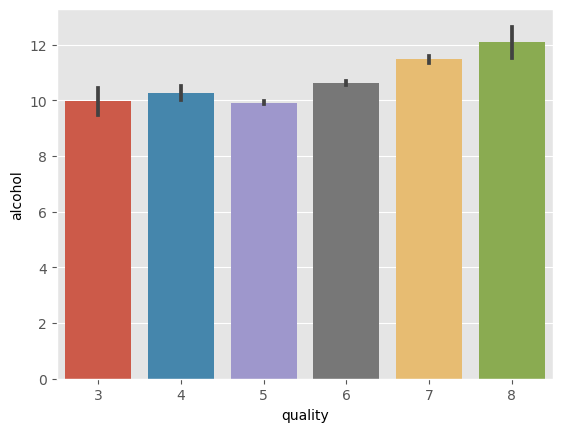

In [15]:
# it's a good idea to visualize the correlation in-between the columns of "alcohol" & "quality" using a bar plot:
sns.barplot(df, x=df['quality'], y=df['alcohol'])
plt.show()

In [18]:
# we allocate the qualities smaller than the "7" equal "0", and the qualities larger than "7" (or equal t0) equal to "1":
df['quality'] = df.quality.apply(lambda x:1 if x>=7 else 0)
# the lambda function has only one output, which is equal to "1," and we consider a 0 for other records.
# in addition, the method of apply accepts a function to applly it to the records of a data set.
# so, what this line of code does is that it accesses the quality column by .quality and then it applies the lambda function, 
# and at last, it replaces the output into the quality column!

In [20]:
# now, we check the counts of the records based on the new change:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [22]:
# now, we determine the Xs and ys:
X = df.drop('quality', axis=1) # axis=1 for the column to be deleted.
y = df['quality']
# we split the data into train and test sections:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=210)

### model selection

#### 1. Logistic Regression

In [23]:
# first, we instantiate the class:
LogReg_model = LogisticRegression()
# we then fit the train data:
LogReg_model.fit(X_train,y_train)
# now, we predict the X_test using the model:
y_pred_LR = LogReg_model.predict(X_test)
# then, we calculate the accuracy score
LogReg_model_acc = accuracy_score(y_pred_LR, y_test)
# we print the accuracy:
print('The accuracy of the Logistic Regression is: {:.2f}%'.format(LogReg_model_acc*100))

The accuracy of the Logistic Regression is: 86.56%


In [24]:
# we now want to print the classification report:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       272
           1       0.58      0.38      0.46        48

    accuracy                           0.87       320
   macro avg       0.74      0.66      0.69       320
weighted avg       0.85      0.87      0.85       320



TN:  259
FN:  30
TP:  18
FP:  13


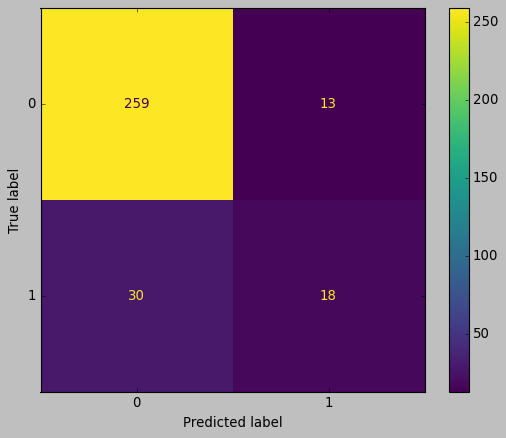

In [25]:
# for the Confusion Matrix:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_LR, labels=LogReg_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LogReg_model.classes_)
display.plot()
print('TN: ', cm[0][0])
print('FN: ', cm[1][0])
print('TP: ', cm[1][1])
print('FP: ', cm[0][1])

#### 2. Decision Tree Model

In [26]:
# first, instantiation:
dtree = DecisionTreeClassifier()
# we fit the data:
dtree.fit(X_train, y_train)
# we predict the X_test:
y_pred_DT = dtree.predict(X_test)
# we calculate the accuracy:
dtree_model_acc = accuracy_score(y_pred_DT, y_test)
# we print the accuracy:
print('The accuracy of the Decision Tree Model is: {:.2f}%'.format(dtree_model_acc*100))

The accuracy of the Decision Tree Model is: 87.19%


In [27]:
# we now want to print the classification report:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       272
           1       0.58      0.54      0.56        48

    accuracy                           0.87       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.87      0.87      0.87       320



TN:  253
FN:  22
TP:  26
FP:  19


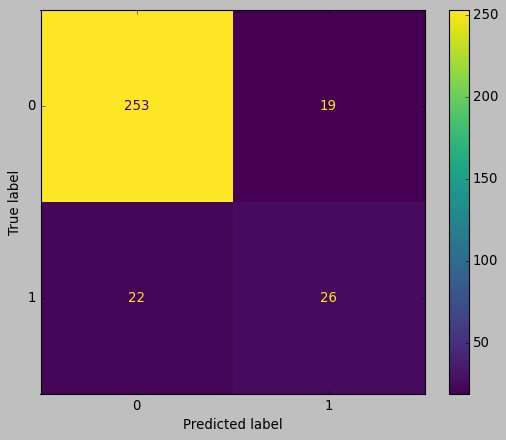

In [28]:
# for the Confusion Matrix:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_DT, labels=dtree.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
display.plot()
print('TN: ', cm[0][0])
print('FN: ', cm[1][0])
print('TP: ', cm[1][1])
print('FP: ', cm[0][1])

#### 3. Random Forest Model

In [29]:
# first, instantiation:
rf = RandomForestClassifier()
# fit the data:
rf.fit(X_train, y_train)
# we predict the X_test:
y_pred_RF = rf.predict(X_test)
# we calculate the accuracy:
rf_model_acc = accuracy_score(y_pred_RF, y_test)
# we print the accuracy:
print('The accuracy of the Decision Tree Model is: {:.2f}%'.format(rf_model_acc*100))

The accuracy of the Decision Tree Model is: 90.00%


In [30]:
# we now want to print the classification report:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       272
           1       0.71      0.56      0.63        48

    accuracy                           0.90       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.89      0.90      0.90       320



TN:  261
FN:  21
TP:  27
FP:  11


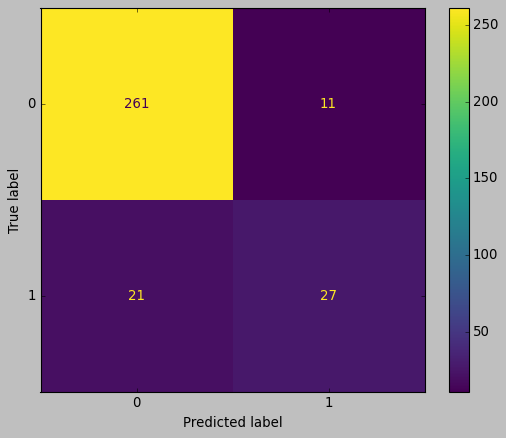

In [31]:
# for the Confusion Matrix:
style.use('classic')
cm = confusion_matrix(y_test, y_pred_RF, labels=rf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
display.plot()
print('TN: ', cm[0][0])
print('FN: ', cm[1][0])
print('TP: ', cm[1][1])
print('FP: ', cm[0][1])

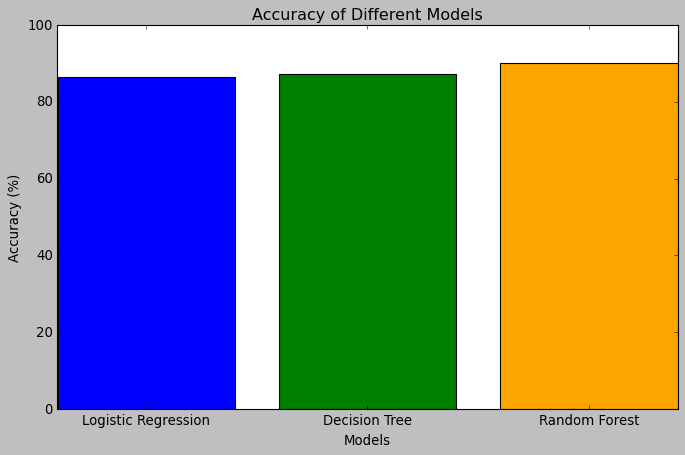

In [36]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [LogReg_model_acc * 100, dtree_model_acc * 100, rf_model_acc * 100]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)  # Set y-axis limits between 0 and 100%
plt.show()


### '''The "random forest" approach showed the highest amount of accuracy. So, the random forest model would be the optimum choice'''